<img src="https://pbs.twimg.com/profile_images/1263477517605797892/Zew7dIVU_400x400.jpg" align="right" width="64"/>

# <span style="justify-content: center;color:#336699;">Lista 5 - Recurrent Neural Networks</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: center;font-size: 90%;">
    Felipe Carvalho
    <br/><br/>
    Programa de Pós-Graduação em Computação Aplicada - INPE/CAP
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contato:  <a href="mailto:lipecaso@gmail.com">lipecaso@gmail.com</a>
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Resumo.</b> Neste relatório, explorou-se a capacidade de generalização de um modelo de Redes Neurais Recorrentes.
</div>

## <span style="color:#336699">Importação dos pacotes</span>

<hr style="border:1px solid #0077b9;">

In [1]:
#
# Importação pandas and numpy
#
import pandas as pd
import numpy as np

#
# Importação matplot lib
#
import matplotlib.pyplot as plt

#
# Importação Keras and tensorflow
#
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from keras.optimizers import Adam
import keras

keras.utils.set_random_seed(812)

2024-11-25 02:33:22.282638: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-25 02:33:22.286014: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-25 02:33:22.296497: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732502002.314616  108024 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732502002.320011  108024 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-25 02:33:22.337375: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

### <span style="color:#336699">Definição de funções utilitárias</span>

<hr style="border:1px solid #0077b9;">

In [2]:
#
# Preparação dos dados de entrada
#
def get_XY(time_series, time_steps):
    Y_ind = np.arange(time_steps, len(time_series), time_steps)
    Y = time_series[Y_ind]
    rows_x = len(Y)
    X = time_series[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y


def get_ts(url: str, time_steps: int, split_percent: float) -> pd.DataFrame:
    data_frame = pd.read_csv(url, usecols=[1])
    data = np.array(data_frame.values.astype('float32')).flatten()
    data = data / data.max()
    N = len(data)
    split = int(N * split_percent)
    train_data = data[0: split]
    test_data = data[split:]

    X_train, y_train = get_XY(train_data, time_steps)
    X_test, y_test = get_XY(test_data, time_steps)

    return data, X_train, X_test, y_train, y_test

### <span style="color:#336699">Criação dos conjuntos de treino, teste e validação </span>

<hr style="border:1px solid #0077b9;">

Nesta lista, considerou-se as seguintes curvas:
1. Série temporal do GOES-16 (disponibilizada no material);
2. Série temporal do GOES-16 (disponibilizada no material);
3. Série temporal NDVI do produto MOD13Q1 de 2001 até 2023 com 23 imagens por ano de um alvo de Agricultura;
4. Série temporal NDVI do produto MOD13Q1 de 2001 até 2023 com 23 imagens por ano de um alvo de Vegetação primária;
5. Série temporal NDVI do produto MOD13Q1 de 2001 até 2023 com 23 imagens por ano de um alvo com transições de usos;

### <span style="color:#336699">Curva 1 - GOES-16 </span>

<hr style="border:1px solid #0077b9;">

#### <span style="color:#336699">Leitura do dado </span>

<hr style="border:1px solid #0077b9;">

In [3]:
url='https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/id_756_time_series.csv'
split_percent=0.3
time_steps=24

In [4]:
data, X_train, X_test, y_train, y_test=get_ts(
    url=url,
    time_steps=time_steps,
    split_percent=split_percent
)

#### <span style="color:#336699">Visualização da série temporal </span>

<hr style="border:1px solid #0077b9;">

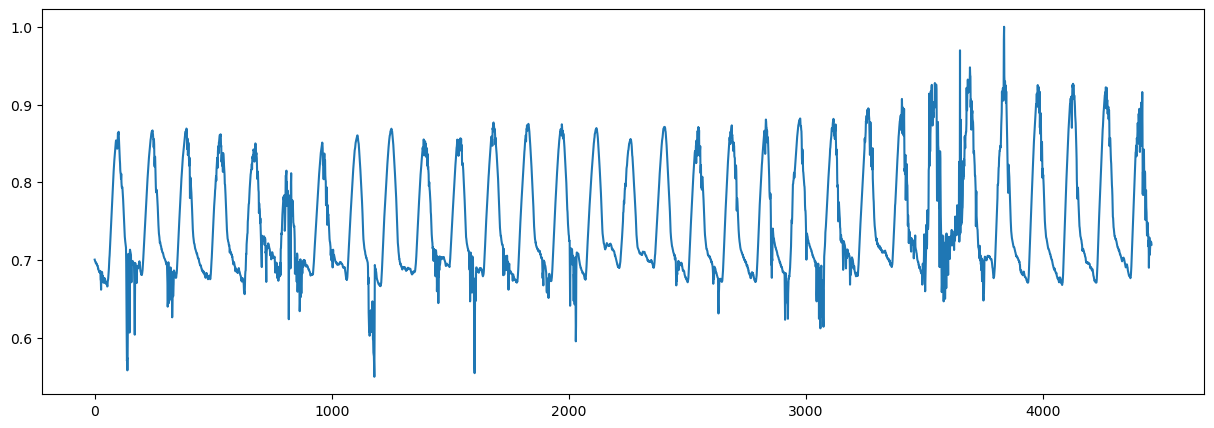

In [5]:
# plot original data to check time-series
plt.figure(figsize=(15, 5))
plt.plot(data, label = 'Original data');

#### <span style="color:#336699">Treinamento do modelo </span>

<hr style="border:1px solid #0077b9;">

In [6]:
#
# Definição dos hiperparametros
#
hidden_units=10
dense_units=1
activation='tanh'

In [7]:
#
# Criação do modelo RNN
#
model = Sequential()
model.add(SimpleRNN(hidden_units,
                    input_shape = (time_steps, 1),
                    activation = activation))
model.add(Dense(units=dense_units, activation=activation))
model.compile(loss='mean_squared_error', optimizer='adam')

2024-11-25 02:33:25.083868: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#
# train the model
#
epochs=30
history=model.fit(
  X_train, y_train,
  epochs = epochs,
  batch_size = 1,
  validation_data = (X_test, y_test)
)

Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3602 - val_loss: 0.0055
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 9/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.8745e-04 - val_loss: 0.0011
Epoch 10/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5408e-04 - val_loss: 0.0010
Epoch 11/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.9273e-04 - val_loss: 9.8505e-04
Epoch 12/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss:

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 395 (1.55 KB)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 264 (1.04 KB)

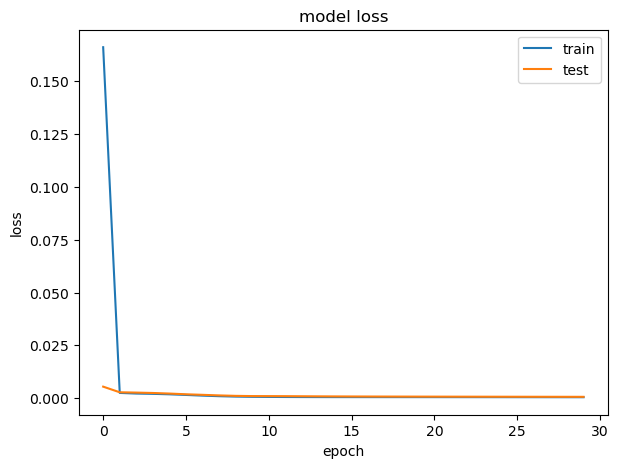

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(122)
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

#### <span style="color:#336699">Predição do modelo </span>

<hr style="border:1px solid #0077b9;">

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


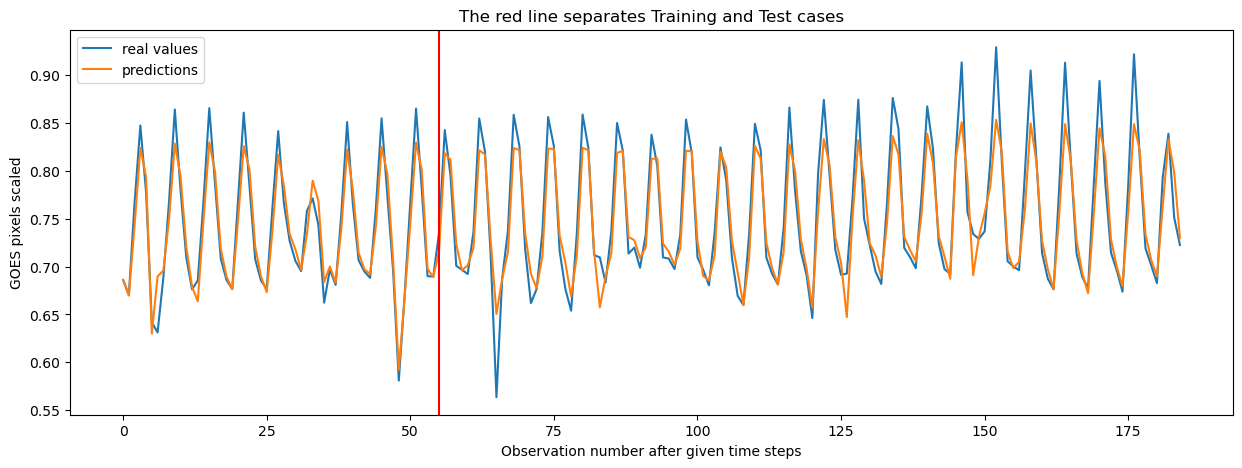

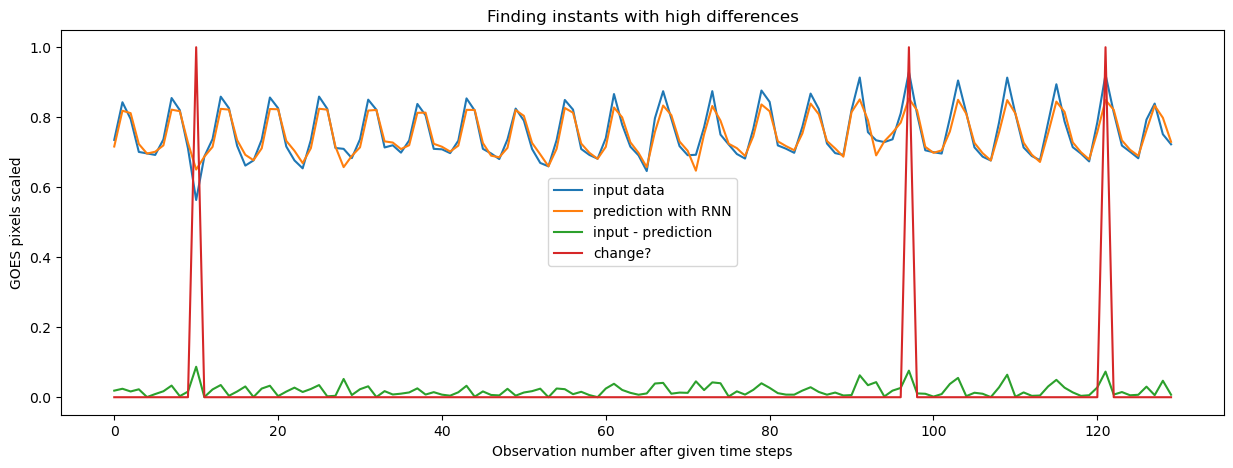

In [11]:
#
# Predicao dos dados de treino e teste
#
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

#
# Junção dos dados de treino, teste e preditos
#
all_data = np.append(y_train, y_test)
predictions = np.append(train_predict, test_predict)

# plot the results
plt.figure(figsize=(15, 5))
plt.plot(all_data, label = 'real values')
plt.plot(predictions, label = 'predictions')
plt.axvline(x = len(y_train), color='r')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('The red line separates Training and Test cases')

difference = np.abs(y_test - test_predict.flatten())
change_threshold = difference.max() * 0.8

plt.figure(figsize=(15, 5))
plt.plot(y_test, label = 'input data')
plt.plot(test_predict.flatten(), label = 'prediction with RNN')
plt.plot(difference, label = 'input - prediction')
plt.plot(difference > change_threshold, label = 'change?')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('Finding instants with high differences');

### <span style="color:#336699">Curva 2 - GOES-16 </span>

<hr style="border:1px solid #0077b9;">

#### <span style="color:#336699">Leitura do dado </span>

<hr style="border:1px solid #0077b9;">

In [12]:
url_curve2='https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/id_703_time_series.csv'
split_percent=0.3
time_steps=24

In [13]:
data, X_train, X_test, y_train, y_test=get_ts(
    url=url_curve2,
    time_steps=time_steps,
    split_percent=split_percent
)

#### <span style="color:#336699">Visualização da série temporal </span>

<hr style="border:1px solid #0077b9;">

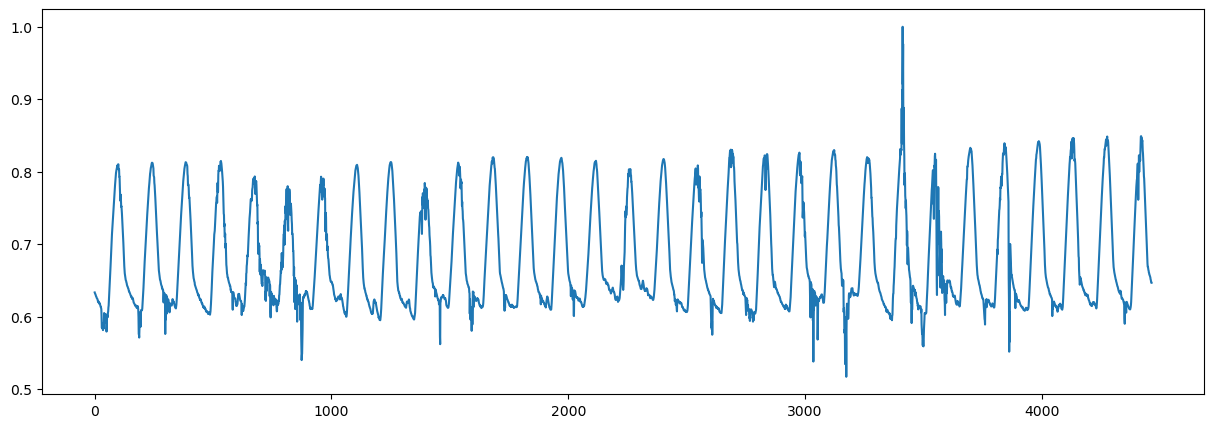

In [14]:
# plot original data to check time-series
plt.figure(figsize=(15, 5))
plt.plot(data, label = 'Original data');

#### <span style="color:#336699">Predição do modelo </span>

<hr style="border:1px solid #0077b9;">

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


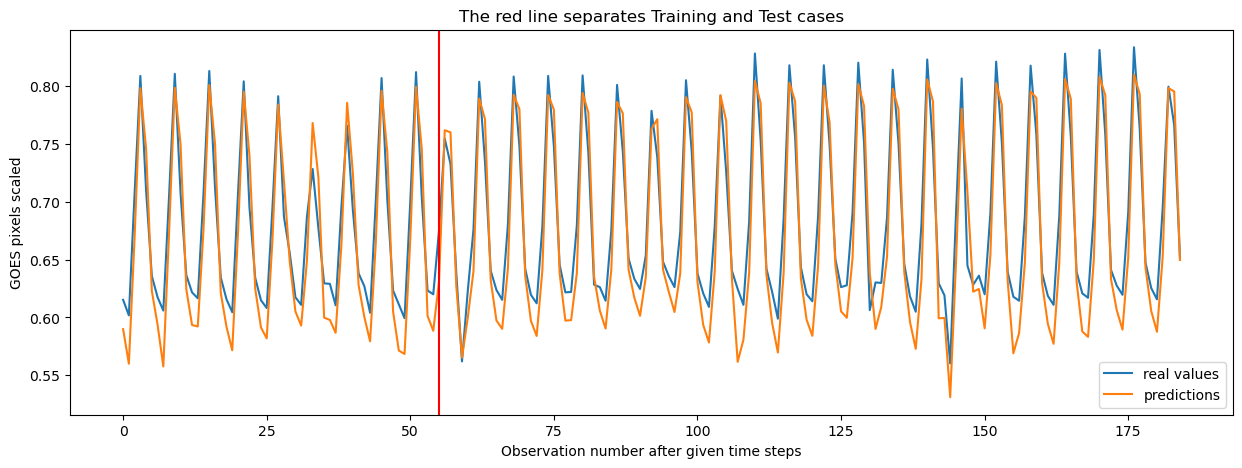

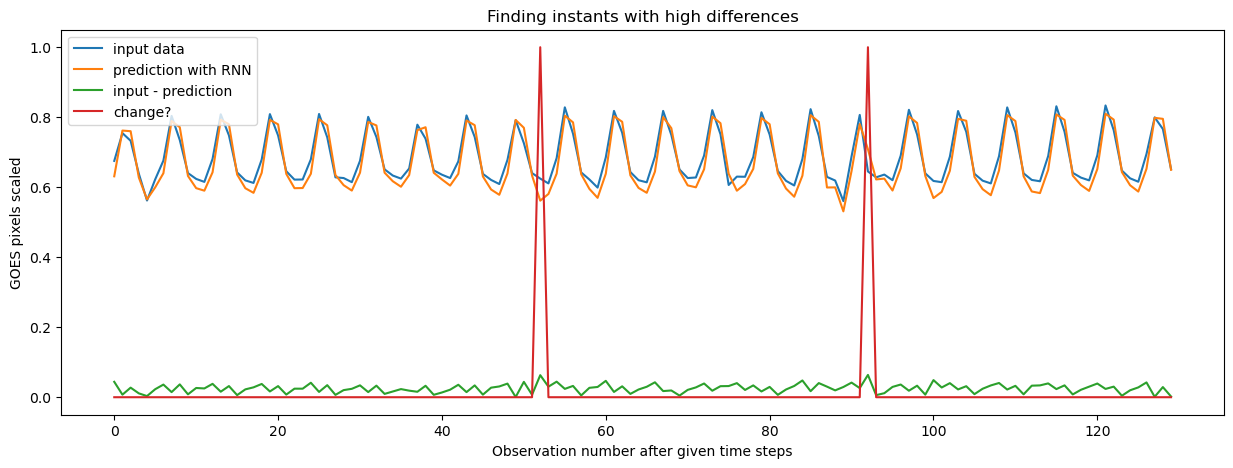

In [15]:
#
# Predicao dos dados de treino e teste
#
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


#
# Junção dos dados de treino, teste e preditos
#
all_data = np.append(y_train, y_test)
predictions = np.append(train_predict, test_predict)

# plot the results
plt.figure(figsize=(15, 5))
plt.plot(all_data, label = 'real values')
plt.plot(predictions, label = 'predictions')
plt.axvline(x = len(y_train), color='r')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('The red line separates Training and Test cases')

difference = np.abs(y_test - test_predict.flatten())
change_threshold = difference.max() * 0.8

plt.figure(figsize=(15, 5))
plt.plot(y_test, label = 'input data')
plt.plot(test_predict.flatten(), label = 'prediction with RNN')
plt.plot(difference, label = 'input - prediction')
plt.plot(difference > change_threshold, label = 'change?')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('Finding instants with high differences');

### <span style="color:#336699">Curva 3 - NDVI/MOD13Q1 - Agricultura </span>

<hr style="border:1px solid #0077b9;">

#### <span style="color:#336699">Leitura do dado </span>

<hr style="border:1px solid #0077b9;">

In [16]:
url_curve3='https://raw.githubusercontent.com/OldLipe/geo-deep-learning/refs/heads/main/data/ts_croplandas_mod13q1.csv' 
split_percent=0.3
time_steps=23

In [17]:
data, X_train, X_test, y_train, y_test=get_ts(
    url=url_curve3,
    time_steps=time_steps,
    split_percent=split_percent
)

#### <span style="color:#336699">Visualização da série temporal </span>

<hr style="border:1px solid #0077b9;">

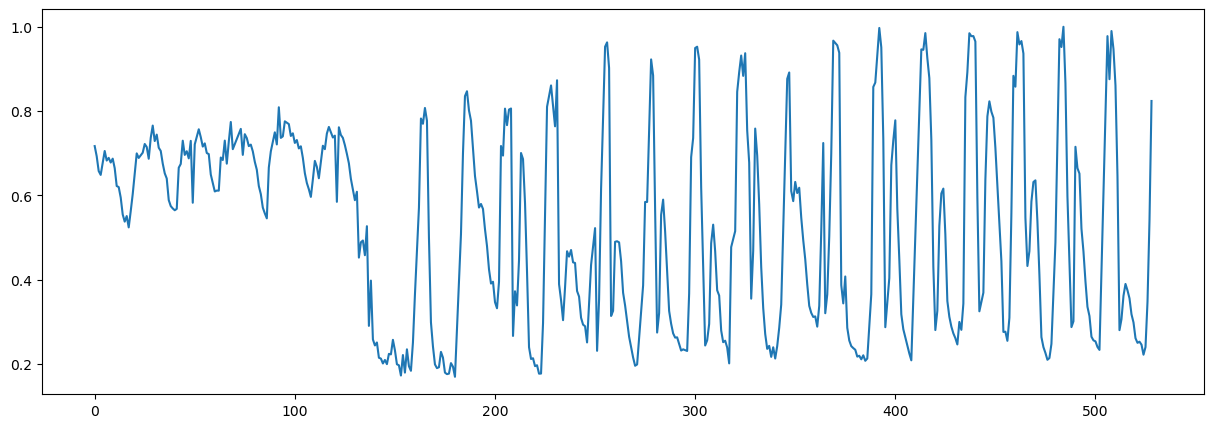

In [18]:
# plot original data to check time-series
plt.figure(figsize=(15, 5))
plt.plot(data, label = 'Original data');

#### <span style="color:#336699">Treinamento do modelo </span>

<hr style="border:1px solid #0077b9;">

In [19]:
#
# Definição dos hiperparametros
#
hidden_units=30
dense_units=1
activation='tanh'

In [20]:
#
# Criação do modelo RNN
#
model = Sequential()
model.add(SimpleRNN(hidden_units,
                    input_shape=(time_steps, 1),
                    activation=activation))
model.add(Dense(units=dense_units, activation=activation))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=1e-3))

/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
#
# train the model
#
epochs=20
history=model.fit(
  X_train, y_train,
  epochs = epochs,
  batch_size = 1,
  validation_data = (X_test, y_test)
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.6347 - val_loss: 0.0582
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1259 - val_loss: 0.0943
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0179 - val_loss: 0.1508
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0123 - val_loss: 0.1571
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - val_loss: 0.1524
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0221 - val_loss: 0.1536
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - val_loss: 0.1537
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - val_loss: 0.1495
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0130 - val_loss: 0.1480
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0123 - val_loss: 0.1469
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - val_loss: 0.1459
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0103 - val_loss: 0.1453
Epoch 13/20


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 30)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,975 (11.62 KB)

 Trainable params: 991 (3.87 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,984 (7.75 KB)

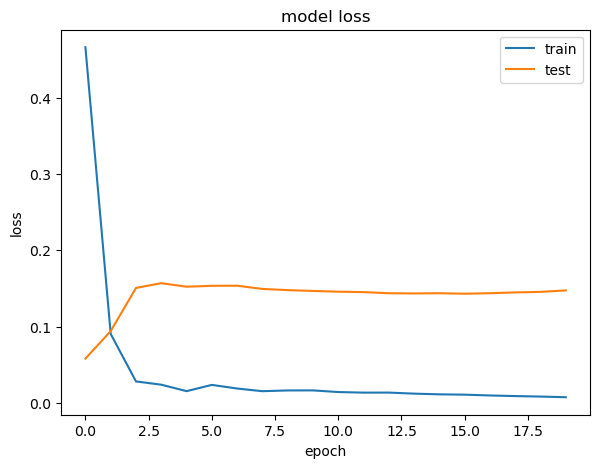

In [23]:
plt.figure(figsize=(15,5))

plt.subplot(122)
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

#### <span style="color:#336699">Predição do modelo </span>

<hr style="border:1px solid #0077b9;">

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


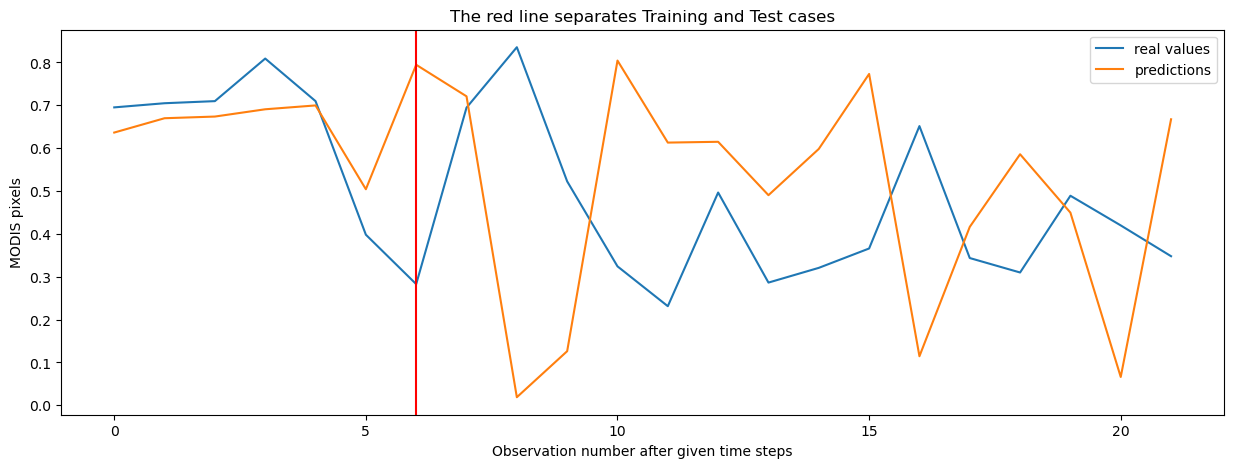

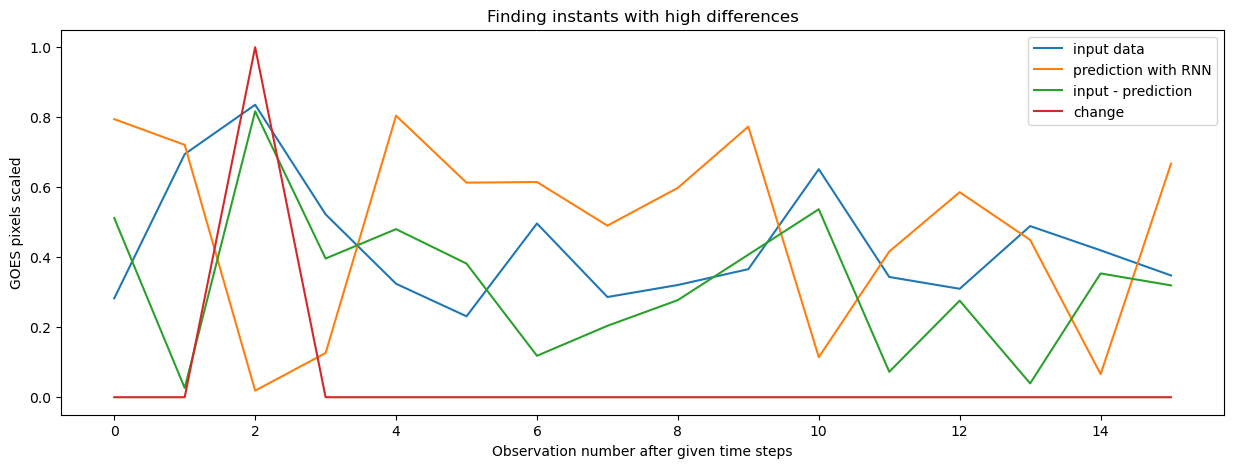

In [24]:
#
# Predicao dos dados de treino e teste
#
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

#
# Junção dos dados de treino, teste e preditos
#
all_data = np.append(y_train, y_test)
predictions = np.append(train_predict, test_predict)

# plot the results
plt.figure(figsize=(15, 5))
plt.plot(all_data, label = 'real values')
plt.plot(predictions, label = 'predictions')
plt.axvline(x = len(y_train), color='r')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('MODIS pixels')
plt.title('The red line separates Training and Test cases')

difference = np.abs(y_test - test_predict.flatten())
change_threshold = difference.max() * 0.8

plt.figure(figsize=(15, 5))
plt.plot(y_test, label = 'input data')
plt.plot(test_predict.flatten(), label = 'prediction with RNN')
plt.plot(difference, label = 'input - prediction')
plt.plot(difference > change_threshold, label = 'change')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('Finding instants with high differences');

Pode-se observar que o modelo apresentou uma predição incorreta em relação a um pico nos dados de entrada. Agora, utilizaremos esse modelo treinado para prever as séries temporais de Floresta e de outras categorias de uso.

### <span style="color:#336699">Curva 4 - NDVI/MOD13Q1 - Floresta </span>

<hr style="border:1px solid #0077b9;">


#### <span style="color:#336699">Leitura do dado </span>

<hr style="border:1px solid #0077b9;">

In [25]:
url_curve4='https://raw.githubusercontent.com/OldLipe/geo-deep-learning/refs/heads/main/data/ts_forest_mod13q1.csv'
split_percent=0.3
time_steps=23

In [26]:
data, X_train, X_test, y_train, y_test=get_ts(
    url=url_curve4,
    time_steps=time_steps,
    split_percent=split_percent
)

#### <span style="color:#336699">Visualização da série temporal </span>

<hr style="border:1px solid #0077b9;">

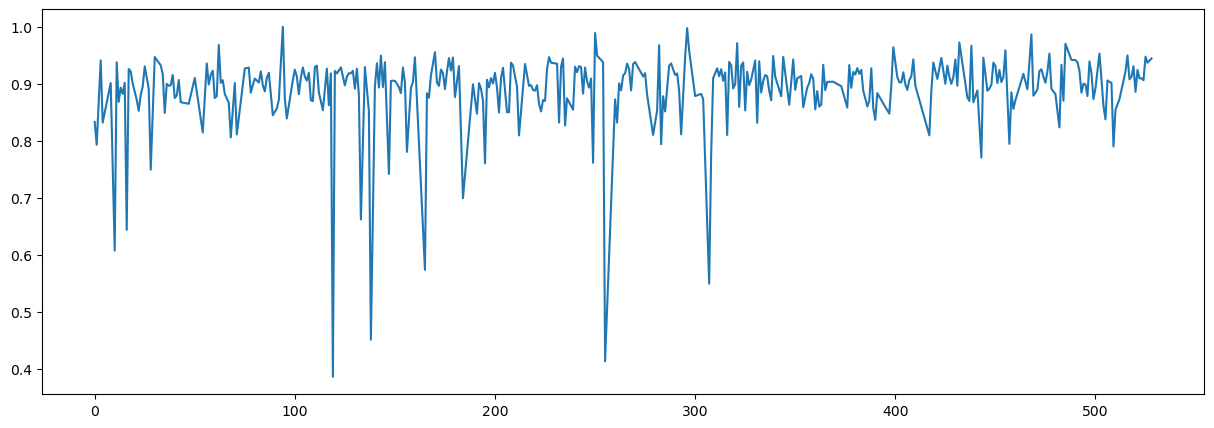

In [27]:
# plot original data to check time-series
plt.figure(figsize=(15, 5))
plt.plot(data, label = 'Original data');

#### <span style="color:#336699">Predição do modelo </span>

<hr style="border:1px solid #0077b9;">

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


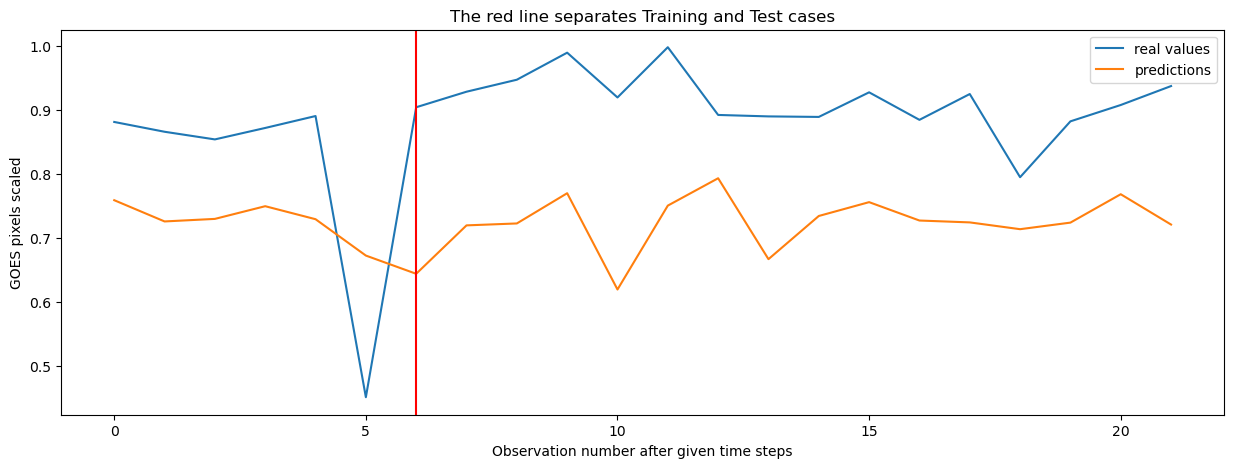

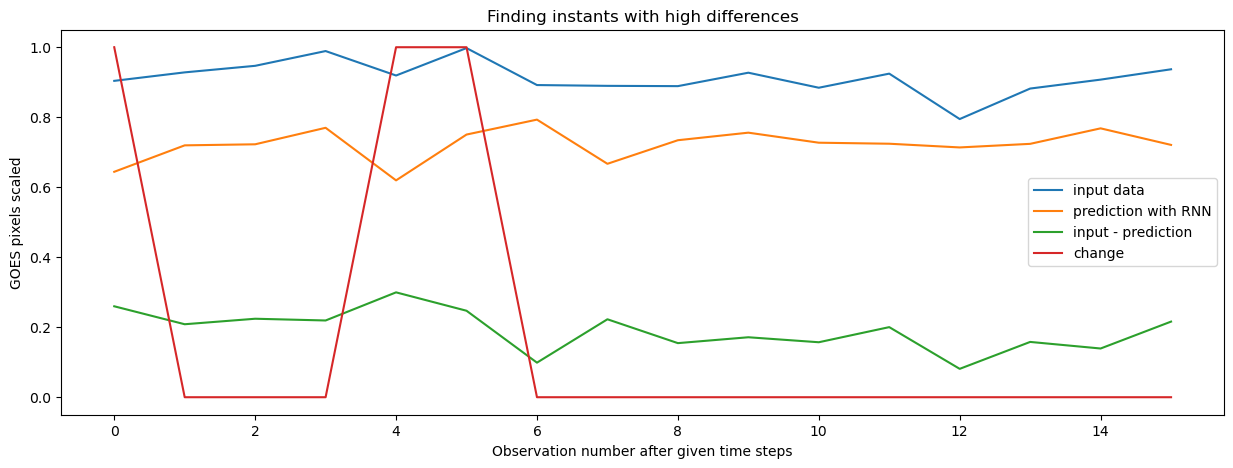

In [28]:
#
# Predicao dos dados de treino e teste
#
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

#
# Junção dos dados de treino, teste e preditos
#
all_data = np.append(y_train, y_test)
predictions = np.append(train_predict, test_predict)

# plot the results
plt.figure(figsize=(15, 5))
plt.plot(all_data, label = 'real values')
plt.plot(predictions, label = 'predictions')
plt.axvline(x = len(y_train), color='r')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('The red line separates Training and Test cases')

difference = np.abs(y_test - test_predict.flatten())
change_threshold = difference.max() * 0.8

plt.figure(figsize=(15, 5))
plt.plot(y_test, label = 'input data')
plt.plot(test_predict.flatten(), label = 'prediction with RNN')
plt.plot(difference, label = 'input - prediction')
plt.plot(difference > change_threshold, label = 'change')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('Finding instants with high differences');

### <span style="color:#336699">Curva 5 - NDVI/MOD13Q1 - Diferentes usos </span>

<hr style="border:1px solid #0077b9;">

#### <span style="color:#336699">Leitura do dado </span>

<hr style="border:1px solid #0077b9;">

In [29]:
url_curve5='https://raw.githubusercontent.com/OldLipe/geo-deep-learning/refs/heads/main/data/ts_multi_mod13q1.csv'
split_percent=0.3
time_steps=23

In [30]:
data, X_train, X_test, y_train, y_test=get_ts(
    url=url_curve5,
    time_steps=time_steps,
    split_percent=split_percent
)

#### <span style="color:#336699">Visualização da série temporal </span>

<hr style="border:1px solid #0077b9;">

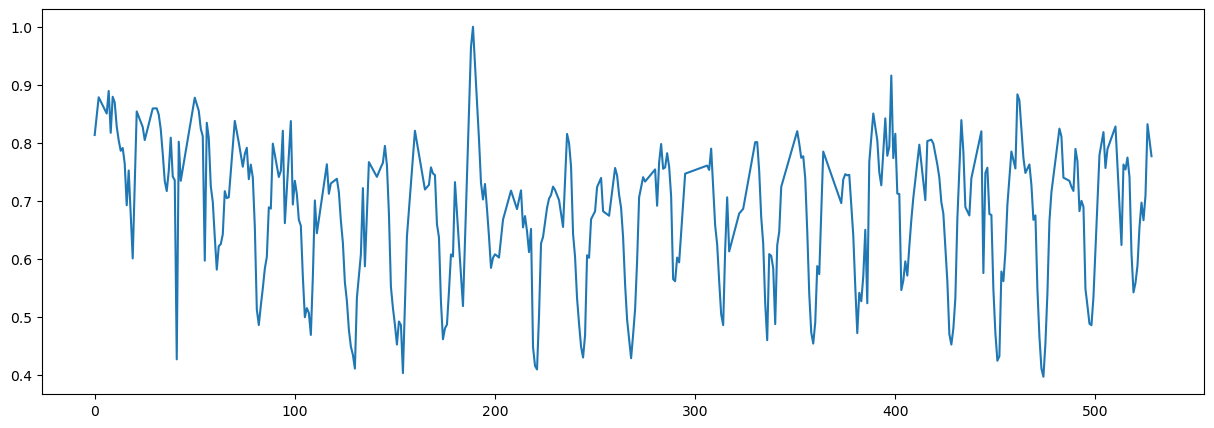

In [31]:
# plot original data to check time-series
plt.figure(figsize=(15, 5))
plt.plot(data, label = 'Original data');

#### <span style="color:#336699">Predição do modelo </span>

<hr style="border:1px solid #0077b9;">

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


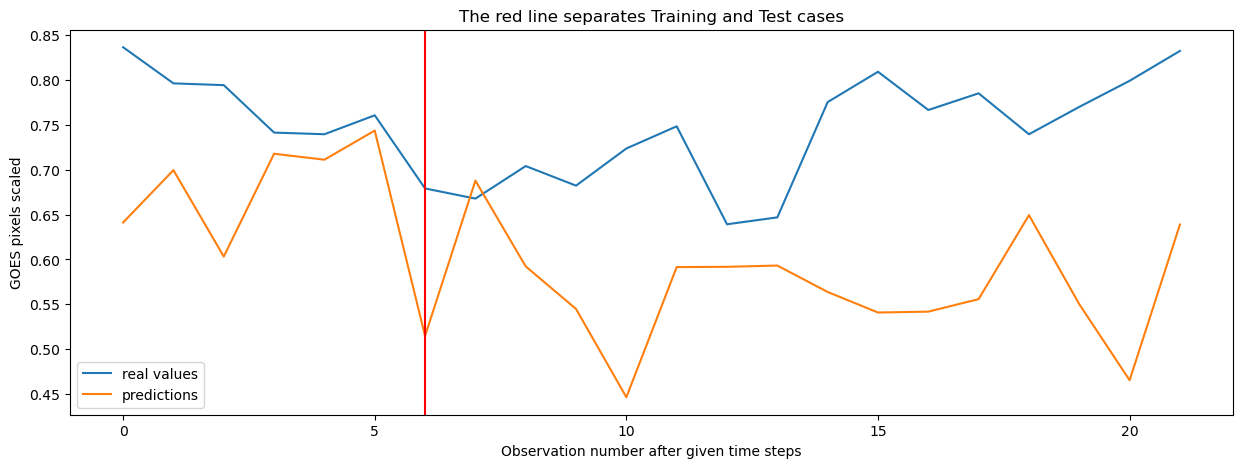

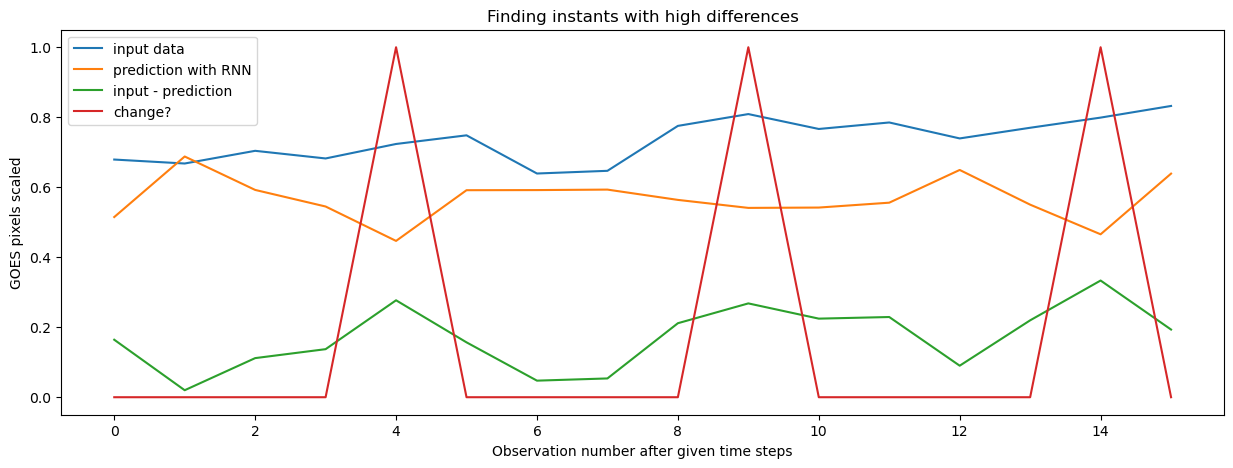

In [32]:
#
# Predicao dos dados de treino e teste
#
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

#
# Junção dos dados de treino, teste e preditos
#
all_data = np.append(y_train, y_test)
predictions = np.append(train_predict, test_predict)

# plot the results
plt.figure(figsize=(15, 5))
plt.plot(all_data, label = 'real values')
plt.plot(predictions, label = 'predictions')
plt.axvline(x = len(y_train), color='r')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('The red line separates Training and Test cases')

difference = np.abs(y_test - test_predict.flatten())
change_threshold = difference.max() * 0.8

plt.figure(figsize=(15, 5))
plt.plot(y_test, label = 'input data')
plt.plot(test_predict.flatten(), label = 'prediction with RNN')
plt.plot(difference, label = 'input - prediction')
plt.plot(difference > change_threshold, label = 'change?')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('Finding instants with high differences');

### <span style="color:#336699">LSTM </span>

<hr style="border:1px solid #0077b9;">

#### <span style="color:#336699">Leitura do dado </span>

<hr style="border:1px solid #0077b9;">

In [33]:
url_curve5='https://raw.githubusercontent.com/OldLipe/geo-deep-learning/refs/heads/main/data/ts_multi_mod13q1.csv'
split_percent=0.3
time_steps=23

In [34]:
data, X_train, X_test, y_train, y_test=get_ts(
    url=url_curve5,
    time_steps=time_steps,
    split_percent=split_percent
)

#### <span style="color:#336699">Visualização da série temporal </span>

<hr style="border:1px solid #0077b9;">

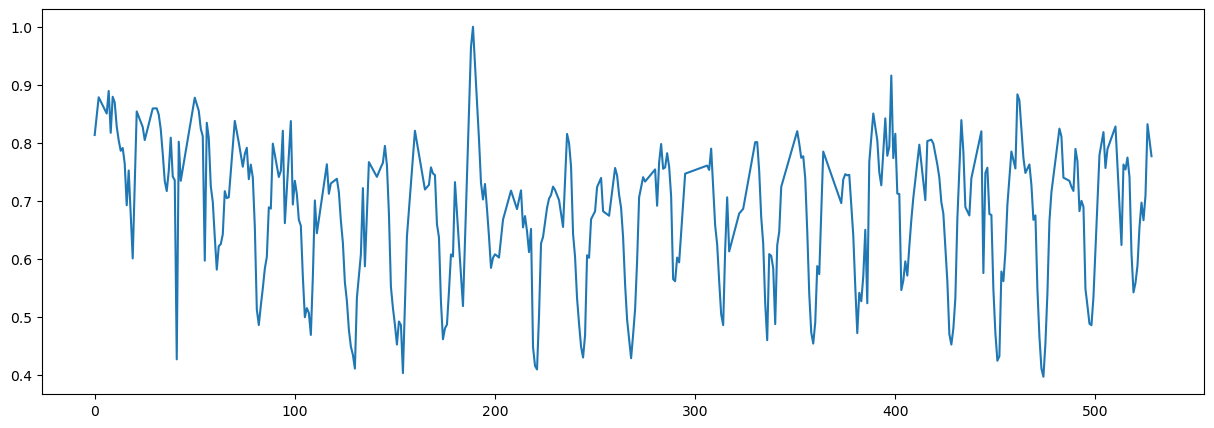

In [35]:
# plot original data to check time-series
plt.figure(figsize=(15, 5))
plt.plot(data, label = 'Original data');

#### <span style="color:#336699">Criação do modelo </span>

<hr style="border:1px solid #0077b9;">

In [36]:
model=Sequential()
model.add(LSTM(units=hidden_units,
               input_shape=(time_steps, 1),
               activation=activation))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')

/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### <span style="color:#336699">Treinamento do modelo </span>

<hr style="border:1px solid #0077b9;">

In [37]:
# train the model
epochs = 30
history = model.fit(
  X_train, y_train,
  epochs = epochs,
  batch_size = 1,
  validation_data = (X_test, y_test)
)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.5302 - val_loss: 0.2974
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2845 - val_loss: 0.1132
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0885 - val_loss: 0.0070
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0044 - val_loss: 0.0304
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0293 - val_loss: 0.0107
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - val_loss: 0.0040
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021 - val_loss: 0.0073
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0041 - val_loss: 0.0049
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014 - val_loss: 0.0032
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4681e-04 - val_loss: 0.0038
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - val_loss: 0.0035
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.7849e-04 - val_loss: 0.0032
Epoc

#### <span style="color:#336699">Treinamento do modelo </span>

<hr style="border:1px solid #0077b9;">

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


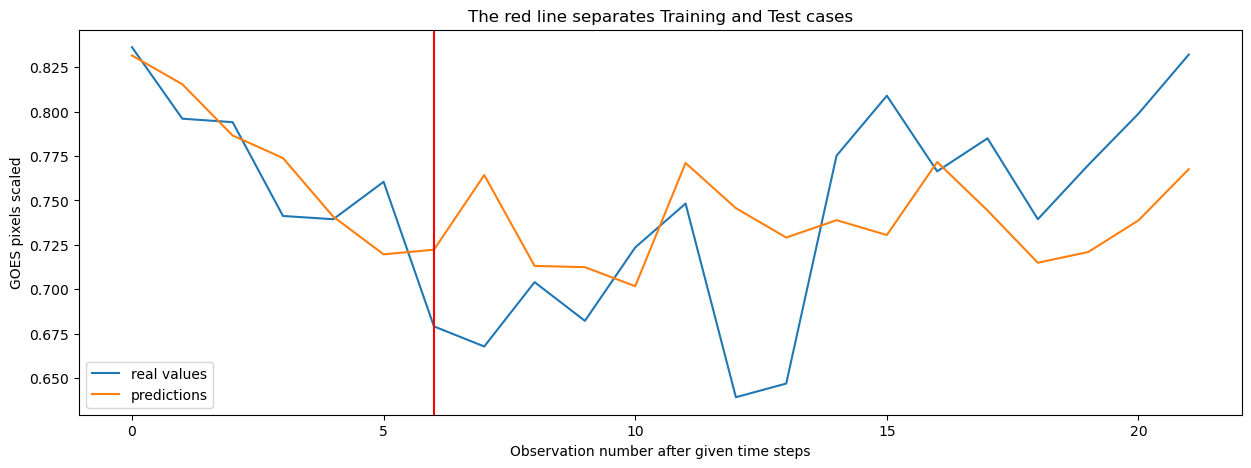

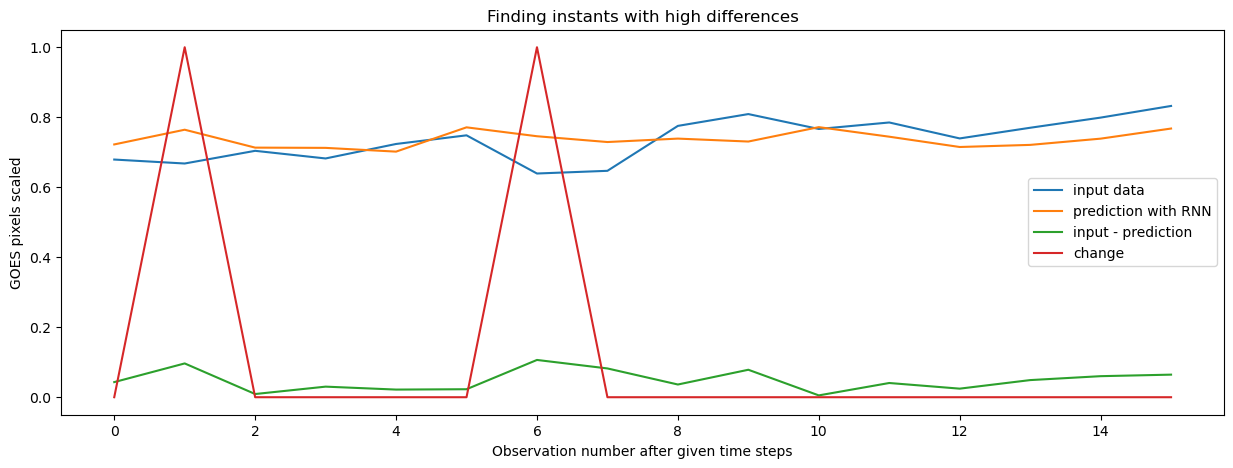

In [38]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

all_data = np.append(y_train, y_test)
predictions = np.append(train_predict, test_predict)

# plot the results
plt.figure(figsize=(15, 5))
plt.plot(all_data, label = 'real values')
plt.plot(predictions, label = 'predictions')
plt.axvline(x = len(y_train), color='r')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('The red line separates Training and Test cases')

difference = np.abs(y_test - test_predict.flatten())
change_threshold = difference.max() * 0.8

plt.figure(figsize=(15, 5))
plt.plot(y_test, label = 'input data')
plt.plot(test_predict.flatten(), label = 'prediction with RNN')
plt.plot(difference, label = 'input - prediction')
plt.plot(difference > change_threshold, label = 'change')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('Finding instants with high differences');